# Collection of all plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gvar as gv

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import bs_ls_avg

## Plots of raw data

In [2]:
from read_data import get_2pt_data, get_ratio_data, get_sum_data
from lametlat.preprocess.read_raw import pt2_to_meff

### Effective mass

/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in sqrt
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.
/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in log
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


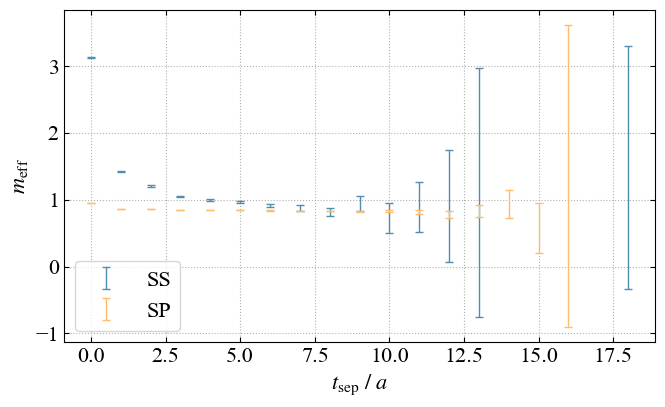

In [3]:
px = py = 4
pz = 0

pt2_ss_real, pt2_ss_imag = get_2pt_data("SS", px, py, pz, jk_bs="bs")

meff_ss = pt2_to_meff(bs_ls_avg(pt2_ss_real), boundary="periodic")[:20]

pt2_sp_real, pt2_sp_imag = get_2pt_data("SP", px, py, pz, jk_bs="bs")

meff_sp = pt2_to_meff(bs_ls_avg(pt2_sp_real), boundary="periodic")[:20]

x_ls = [np.arange(20), np.arange(20)]
y_ls = [gv.mean(meff_ss), gv.mean(meff_sp)]
yerr_ls = [gv.sdev(meff_ss), gv.sdev(meff_sp)]
label_ls = ["SS", "SP"]

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, color=color_ls[idx], label=label_ls[idx], **errorb)
ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"$m_{\mathrm{eff}}$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()

### Ratio data plot

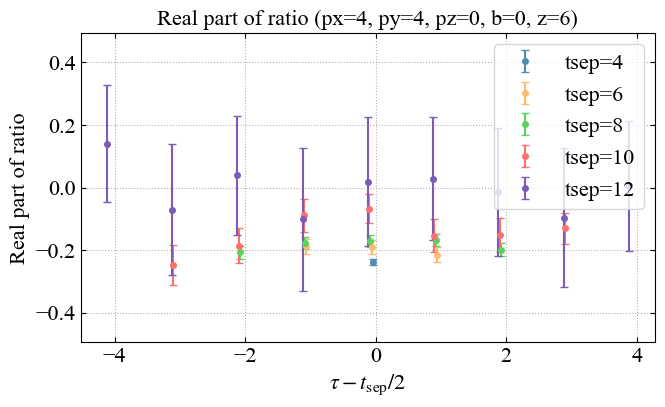

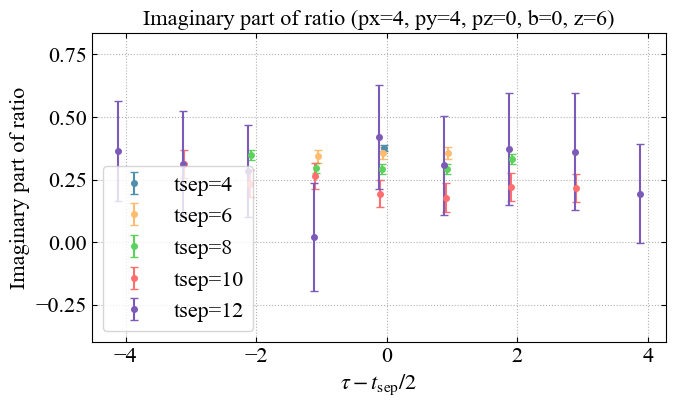

In [5]:
px = py = 4
pz = 0
b = 0
z = 6
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
flavor = None # None means (U-D)/2

ra_real, ra_imag = get_ratio_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", flavor=flavor)
ra_real_avg = bs_ls_avg(ra_real)
ra_imag_avg = bs_ls_avg(ra_imag)

# * real part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01 )
    y_ls.append(gv.mean(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=3, markersize=4, 
                color=color_ls[idx], label=label_ls[idx])

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Real part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Real part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()



# * Imaginary part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01 )
    y_ls.append(gv.mean(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

# Imaginary part
fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=3, markersize=4, 
                color=color_ls[idx], label=label_ls[idx])

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Imaginary part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Imaginary part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()



### Sum data plot

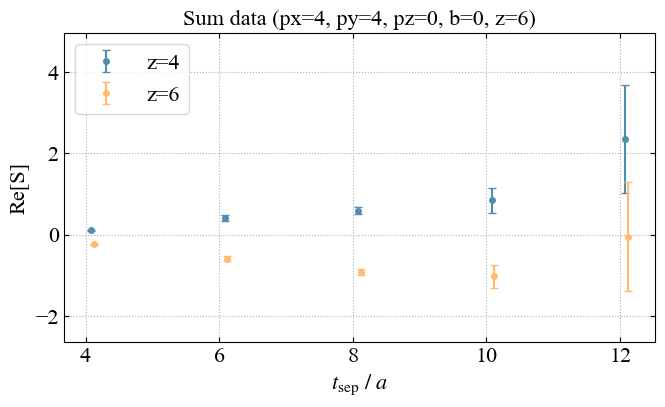

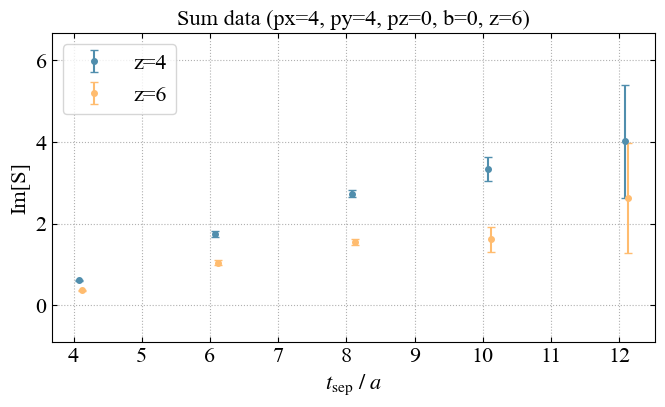

In [9]:
px = py = 4
pz = 0
b = 0
z = 6
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
z_ls = np.arange(4, 8, 2)
flavor = None # None means (U-D)/2


# * real part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor)
    sum_real_avg = bs_ls_avg(sum_real)
    
    x_ls.append(np.array(tsep_ls) + 0.02 * z)
    y_ls.append(gv.mean(sum_real_avg))
    yerr_ls.append(gv.sdev(sum_real_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot() 

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=3, markersize=4, 
                color=color_ls[idx], label=label_ls[idx])

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Re[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part  

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor)
    sum_imag_avg = bs_ls_avg(sum_imag)
    
    x_ls.append(np.array(tsep_ls) + 0.02 * z)
    y_ls.append(gv.mean(sum_imag_avg))
    yerr_ls.append(gv.sdev(sum_imag_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot() 

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=3, markersize=4, 
                color=color_ls[idx], label=label_ls[idx])

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Im[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()
    

